# Proyek Analisis Data: E-Commerce Public Data Analysis Project
- **Nama:** Muhammad Harsyam
- **Email:** jja85120@gmail.com
- **ID Dicoding:** muhammad_harsyam

## Menentukan Pertanyaan Bisnis

- Apa produk yang paling banyak terjual dan berapa total penjualannya?
- Bagaimana pergerakan penjualan setiap bulannya

## Import Semua Packages/Library yang Digunakan

In [ ]:
# memanggil semua library yang dibutuhkan.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [ ]:
# Membaca seluruh dataset
orders = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/orders_dataset.csv')
items = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/order_items_dataset.csv')
products = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/products_dataset.csv')
payments = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/order_payments_dataset.csv')
reviews = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/order_reviews_dataset.csv')
customers = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/customers_dataset.csv')
sellers = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/sellers_dataset.csv')
geolocation = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/geolocation_dataset.csv')
category = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/product_category_name_translation.csv')

data = {'orders': orders,
        'items': items,
        'products': products,
        'payments': payments,
        'reviews': reviews,
        'customers': customers,
        'sellers': sellers,
        'geo': geolocation,
        'category': category}

In [ ]:
# Menggabungkan customers dan orders
merged_df = pd.merge(orders, customers, on='customer_id', how='inner')

# Menggabungkan hasil dengan order_items
merged_df = pd.merge(merged_df, items, on='order_id', how='inner')

# Menggabungkan order_items dengan products
merged_df = pd.merge(merged_df, products, on='product_id', how='inner')

# Menampilkan hasil penggabungan
merged_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,...,174.90,20.10,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,205.99,65.02,eletrodomesticos_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,179.99,40.59,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,179.99,40.59,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_approved_at              112635 non-null  object 
 5   order_delivered_carrier_date   111456 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  112650 non-null  object 
 8   customer_unique_id             112650 non-null  object 
 9   customer_zip_code_prefix       112650 non-null  int64  
 10  customer_city                  112650 non-null  object 
 11  customer_state                 112650 non-null  object 
 12  order_item_id                 

**Insight:**
Seteah dilakukan merge didapatkan dataset baru yang terdiri 25 kolom dan 112650 baris


### Assessing Data

In [ ]:
# Identifikaisi Missing Value
merged_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,15
order_delivered_carrier_date,1194
order_delivered_customer_date,2454
order_estimated_delivery_date,0
customer_unique_id,0
customer_zip_code_prefix,0


In [ ]:
# Identifikasi data dupikat
merged_df.duplicated().sum()

0

In [ ]:
# Identifikasi data pencilan atau outlier
numerical_df = merged_df.select_dtypes(include=np.number)

q25, q75 = np.percentile(numerical_df, 25), np.percentile(numerical_df, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

# Filter outliers based on numerical columns only
outliers = numerical_df[(numerical_df < minimum) | (numerical_df > maximum)].any(axis=1)

# Get the original dataframe rows that are outliers
outlier_rows = merged_df[outliers]
outlier_rows

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


**Insight:**
- dari indentifikasi missing value ditemukan dataset masih memiliki banyak nilai null atau missing namun
- pemeriksaan data duplikat dan oulier tidak ditemukan maslah

### Cleaning Data

In [ ]:
# Mengatasi missing value dengan menggunakan metode dropna
merged_df.dropna(axis=0, inplace=True)
# mengecek missing value
merged_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0
customer_unique_id,0
customer_zip_code_prefix,0


In [ ]:
# Mengonversi kolom tanggal ke tipe datetime
merged_df['order_delivered_carrier_date'] = pd.to_datetime(merged_df['order_delivered_carrier_date'])
merged_df['order_delivered_customer_date'] = pd.to_datetime(merged_df['order_delivered_customer_date'])
merged_df['order_estimated_delivery_date'] = pd.to_datetime(merged_df['order_estimated_delivery_date'])

**Insight:**
- metode yang digunakan dalam mengatasi missing value pada dataset diatas menggunaka metode droppin hal ini karena dataset memiliki jumlah baris yag cukup besar sehingga tidak mengganggu informasi yang didapatkan
- Mengonversi kolom tanggal ke tipe datetime agar data menganalisis waktu pengiriman barang

## Exploratory Data Analysis (EDA)

### Mengeksplorasi Parameter Statistik dari Data

In [ ]:
# Eksplor deskripsi dataset
merged_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,108643,108643,108643,108643,108643,108643,108643,108643,108643,108643.000000,...,108643.000000,108643.000000,108643,108643.000000,108643.000000,108643.000000,108643.000000,108643.000000,108643.000000,108643.000000
unique,95129,95129,2,94625,87125,NaN,NaN,NaN,92082,NaN,...,NaN,NaN,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2018-02-24 03:20:27,NaN,NaN,NaN,c8460e4251689ba205045f3ea17884a1,NaN,...,NaN,NaN,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,21,21,108636,21,23,NaN,NaN,NaN,24,NaN,...,NaN,NaN,10952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2018-01-06 03:55:38.629060352,2018-01-15 08:28:43.203317504,2018-01-26 16:38:54.368528128,NaN,35145.541618,...,120.085372,19.982591,NaN,48.807691,787.319781,2.210810,2095.564178,30.197629,16.588312,23.030467
min,NaN,NaN,NaN,NaN,NaN,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,NaN,1003.000000,...,0.850000,0.000000,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,NaN,NaN,NaN,2017-09-19 17:44:58.500000,2017-09-27 18:29:42,2017-10-06 00:00:00,NaN,11310.000000,...,39.900000,13.080000,NaN,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,NaN,NaN,NaN,2018-01-25 15:13:21,2018-02-05 14:13:22,2018-02-19 00:00:00,NaN,24342.000000,...,74.900000,16.290000,NaN,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,NaN,NaN,NaN,2018-05-09 09:52:00,2018-05-16 16:05:52,2018-05-28 00:00:00,NaN,59063.000000,...,134.900000,21.160000,NaN,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,NaN,NaN,NaN,NaN,NaN,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,NaN,99980.000000,...,6735.000000,409.680000,NaN,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


<Figure size 1500x1000 with 0 Axes>

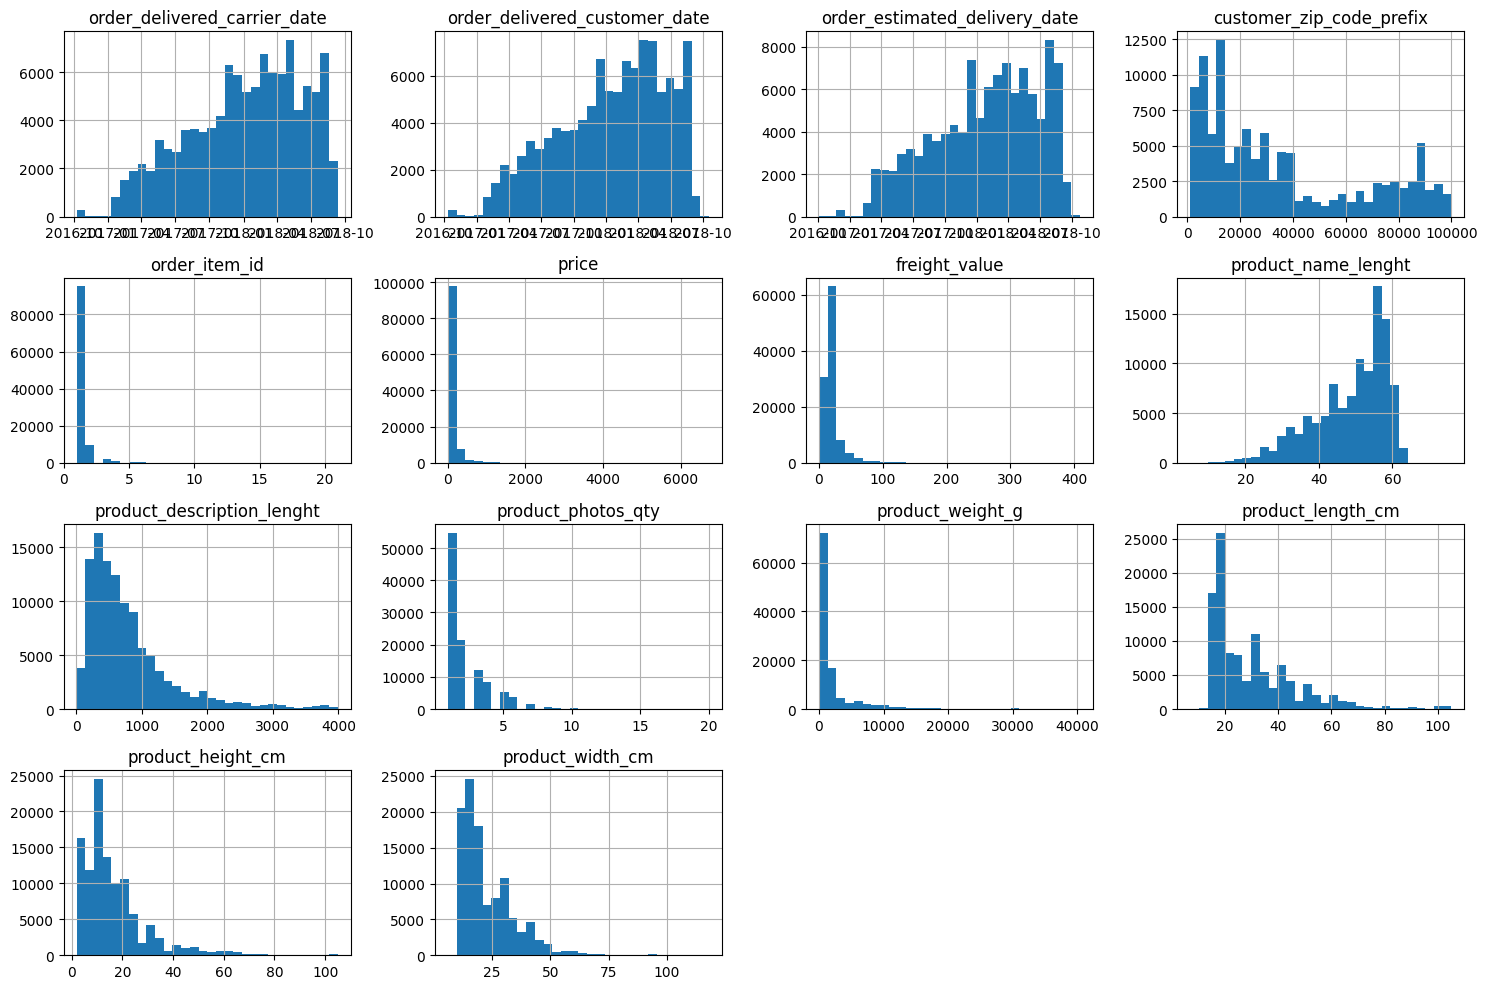

In [ ]:
# memeriksa distribusi data secara cepat.

# Mengatur ukuran figure
plt.figure(figsize=(15, 10))  # Atur lebar dan tinggi figure sesuai kebutuhan

# Membuat histogram
merged_df.hist(bins=30, figsize=(15, 10), layout=(4, 4))  # Atur layout jika perlu
plt.tight_layout()  # Mengatur layout agar tidak tumpang tindih
plt.show()

#### Histogram untuk kolom price dan product_weight_g menunjukkan distribusi yang sangat miring ke kiri, dengan sebagian besar produk memiliki harga yang relatif rendah dan berat yang lebih ringan.  Histogram untuk kolom order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date menunjukkan bahwa ada peningkatan jumlah pesanan yang dikirim dan diterima dalam rentang waktu tertentu, terutama menjelang akhir tahun 2017 dan awal tahun 2018.

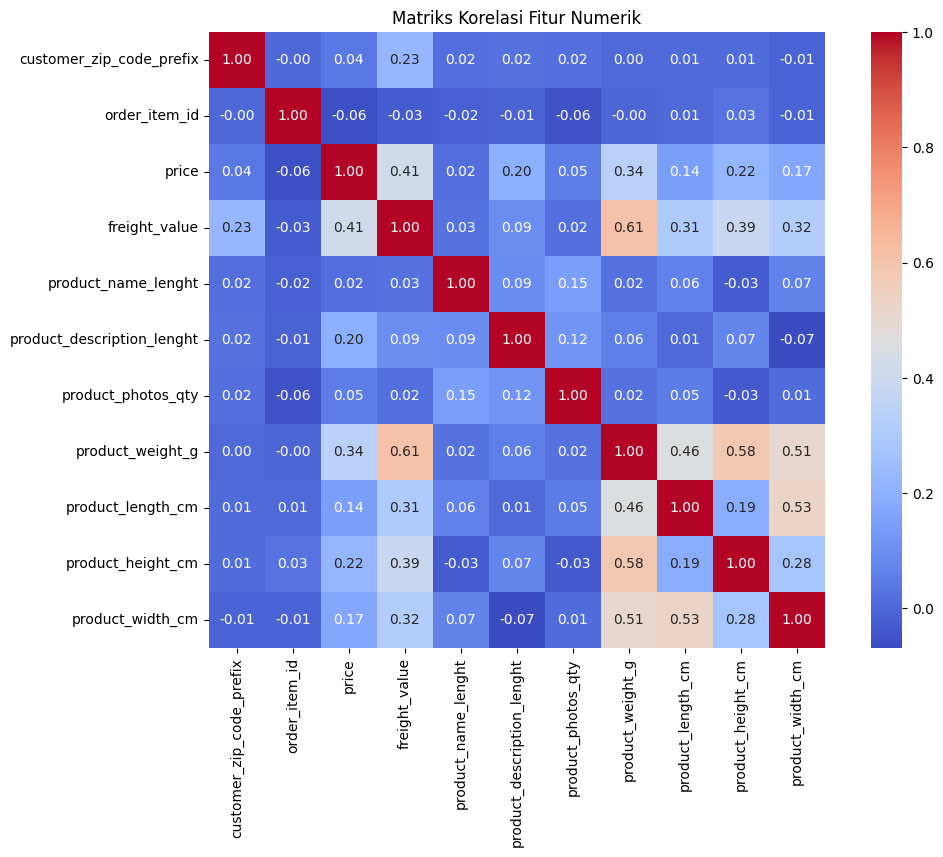

In [ ]:
# Select only numeric features for correlation calculation
numerical_features = merged_df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Mengatur ukuran figure
plt.figure(figsize=(12, 8))

# Membuat heatmap untuk matriks korelasi
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)

# Menambahkan judul
plt.title('Matriks Korelasi Fitur Numerik')

# Menampilkan heatmap
plt.show()

#### Terdapat korelasi positif yang signifikan antara price dan product_weight_g (0.61). Ini menunjukkan bahwa produk yang lebih berat cenderung memiliki harga yang lebih tinggi. Terdapat korelasi positif yang moderat antara product_photos_qty dan product_description_lenght (0.15). Ini menunjukkan bahwa produk dengan deskripsi yang lebih panjang cenderung memiliki lebih banyak foto.

In [ ]:
# Mengetahui jumlah produk per kategory
jumlah_produk_per_kategori = merged_df.groupby('product_category_name')['product_id'].nunique().reset_index()
jumlah_produk_per_kategori

,product_category_name,product_id
0,agro_industria_e_comercio,71
1,alimentos,79
2,alimentos_bebidas,99
3,artes,52
4,artes_e_artesanato,19
...,...,...
68,sinalizacao_e_seguranca,91
69,tablets_impressao_imagem,9
70,telefonia,1112
71,telefonia_fixa,113


In [ ]:
jumlah_pesanan_per_status = merged_df.groupby('order_status')['order_id'].count().reset_index()
jumlah_pesanan_per_status

,order_status,order_id
0,canceled,7
1,delivered,108636


In [ ]:
# Menghitung ketepatan pengiriman
merged_df['on_time'] = merged_df['order_delivered_customer_date'] <= merged_df['order_estimated_delivery_date']
jumlah_tepat_waktu = merged_df['on_time'].sum()
total_pesanan = merged_df.shape[0]

# Menampilkan hasil
print(f'Jumlah pesanan yang dikirim tepat waktu: {jumlah_tepat_waktu}')
print(f'Total pesanan: {total_pesanan}')
print(f'Persentase pengiriman tepat waktu: {jumlah_tepat_waktu / total_pesanan * 100:.2f}%')

Jumlah pesanan yang dikirim tepat waktu: 100073
Total pesanan: 108643
Persentase pengiriman tepat waktu: 92.11%


**Insight:**
- data menunjukkan adanya tren musiman dalam pengiriman, di mana mungkin ada lebih banyak pesanan yang dilakukan selama periode liburan atau promosi. Perusahaan dapat memanfaatkan informasi ini untuk merencanakan kapasitas pengiriman dan manajemen inventaris yang lebih baik selama periode puncak.
- Sebagian besar produk dalam dataset adalah produk dengan harga terjangkau dan mungkin lebih kecil atau lebih ringan. Perusahaan dapat mempertimbangkan untuk memperluas penawaran produk premium atau produk dengan berat lebih tinggi untuk menarik segmen pasar yang berbeda, serta mengeksplorasi strategi pemasaran yang lebih agresif untuk produk dengan harga lebih tinggi.
- Perusahaan dapat mempertimbangkan untuk menekankan kualitas dan nilai produk yang lebih berat dalam strategi pemasaran mereka. Selain itu, ini dapat menjadi indikator bahwa produk dengan berat lebih tinggi mungkin memiliki fitur atau bahan yang lebih premium, yang dapat menarik segmen pasar yang lebih kaya.
- Perusahaan dapat mendorong penjual untuk meningkatkan kualitas dan kuantitas informasi produk mereka untuk meningkatkan konversi penjualan.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa produk yang paling banyak terjual dan berapa total penjualannya?

<ipython-input-18-20f769e711f1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_kategori, x='product_category_name', y='order_id', palette='viridis')


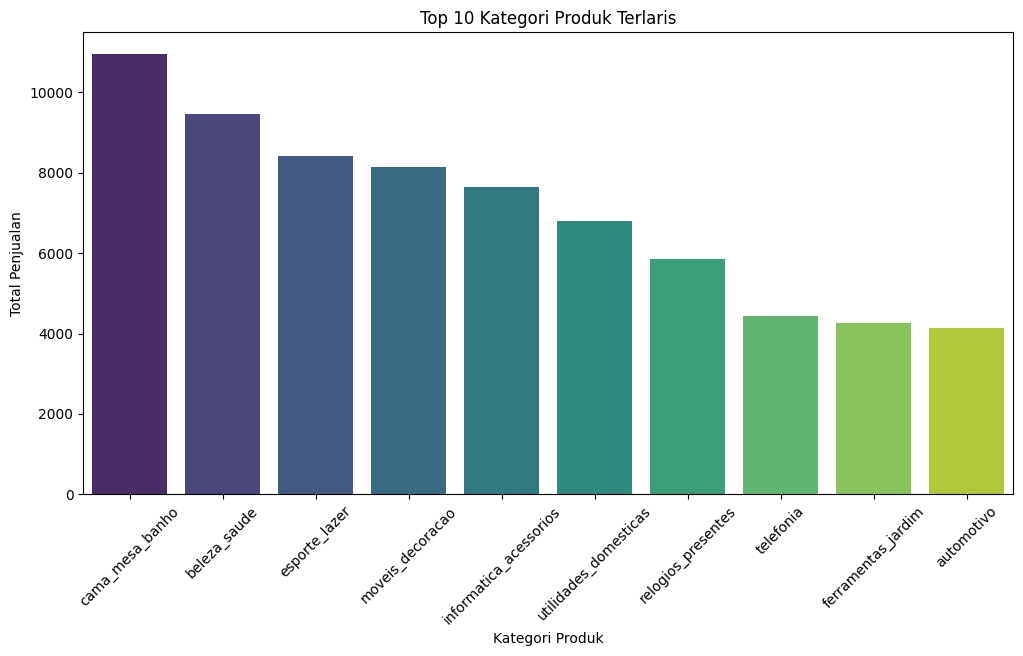

In [ ]:
# Total penjualan per kategori
total_penjualan_per_kategori = merged_df.groupby('product_category_name')['order_id'].count().reset_index()

# Mengurutkan dan mengambil 10 kategori teratas
top_10_kategori = total_penjualan_per_kategori.sort_values(by='order_id', ascending=False).head(10)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_kategori, x='product_category_name', y='order_id', palette='viridis')
plt.title('Top 10 Kategori Produk Terlaris')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.show()

In [ ]:
top_10_kategori

,product_category_name,order_id
13,cama_mesa_banho,10952
11,beleza_saude,9467
32,esporte_lazer,8429
54,moveis_decoracao,8156
44,informatica_acessorios,7643
72,utilidades_domesticas,6795
66,relogios_presentes,5857
70,telefonia,4428
40,ferramentas_jardim,4267
8,automotivo,4139


### Pertanyaan 2: Bagaimana pergerakan penjualan setiap bulannya

<ipython-input-20-55626e820e80>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = filtered_df['order_purchase_timestamp'].dt.to_period('M')


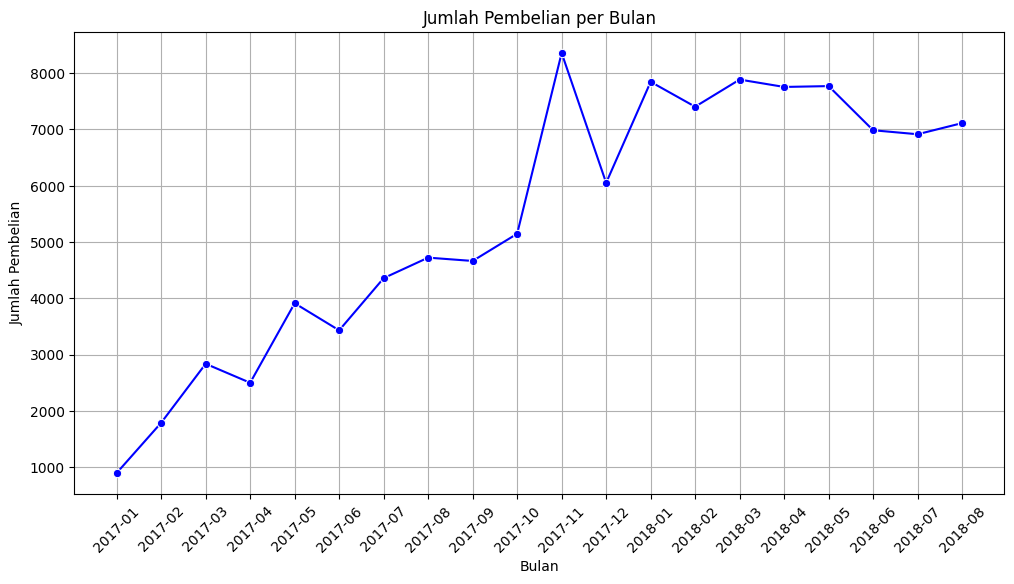

In [ ]:
# Mengonversi kolom tanggal ke tipe datetime
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])

# Memfilter data berdasarkan periode
filtered_df = merged_df[(merged_df['order_purchase_timestamp'] >= '2017-01-01') & (merged_df['order_purchase_timestamp'] <= '2019-01-01')]

# Menghitung jumlah pembelian per bulan
filtered_df['month'] = filtered_df['order_purchase_timestamp'].dt.to_period('M')
pembelian_per_bulan = filtered_df.groupby('month')['order_id'].count().reset_index()

# Convert kolom'month' sebelum melakukan visualisasi
pembelian_per_bulan['month'] = pembelian_per_bulan['month'].astype(str)

# Visualisasi Line Chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=pembelian_per_bulan, x='month', y='order_id', marker='o', color='blue')
plt.title('Jumlah Pembelian per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pembelian')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Insight:**
- Kategori produk yang berkaitan dengan kebutuhan rumah tangga dan kesehatan tampaknya sangat diminati. kategori automotivo dan ferramentas_jardim tidak berada di urutan teratas namun, produk ini masih menunjukkan potensi untuk mengalami pertumbuhan.
- Secara keseluruhan, terdapat tren pertumbuhan yang jelas dalam jumlah pembelian dari awal 2017 hingga pertengahan 2018, meskipun ada fluktuasi bulanan serta Terjadi lonjakan signifikan dalam jumlah pembelian pada bulan November 2017. Lonjakan ini mungkin terkait dengan promosi khusus, seperti Black Friday atau kampanye penjualan akhir tahun.

## Conclusion

- Kategori produk yang berkaitan dengan kebutuhan rumah tangga dan kesehatan menunjukkan minat yang tinggi di kalangan konsumen. Meskipun kategori automotivo dan ferramentas_jardim tidak berada di urutan teratas, keduanya masih memiliki potensi untuk mengalami pertumbuhan di masa depan.
- Tren Pertumbuhan yang Jelas: Secara keseluruhan, terdapat tren pertumbuhan yang jelas dalam jumlah pembelian dari awal 2017 hingga pertengahan 2018. Meskipun ada fluktuasi bulanan, lonjakan signifikan terjadi pada bulan November 2017. Lonjakan ini kemungkinan terkait dengan promosi khusus, seperti Black Friday atau kampanye penjualan akhir tahun.
Dengan memahami pola pembelian dan kategori produk yang diminati, perusahaan dapat merancang strategi pemasaran yang lebih efektif untuk meningkatkan penjualan, terutama selama periode dengan potensi pertumbuhan yang lebih tinggi.

In [ ]:
data = merged_df.to_csv('/content/drive/MyDrive/data clean/Analisi Penjualan.csv')

In [ ]:
merged_df.to_csv('data_merged.csv', index=False)